# Flux Vision Data

In [113]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify

%matplotlib inline

In [29]:
# reading the csv file
df = pd.read_csv('data/Zoning Province/Flux_24h.csv',sep = ';')
#consider only 'Date','Origin' and 'Destination'
df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()
df

,Date,Origin,Destination,Volume
0,2020-02-01,Bas-Uele,Tshopo,124
1,2020-02-01,Equateur,Kinshasa,403
2,2020-02-01,Equateur,Mongala,285
3,2020-02-01,Equateur,Sud-Ubangi,574
4,2020-02-01,Equateur,Tshuapa,290
...,...,...,...,...
11101,2020-04-26,Tshopo,Maniema,572
11102,2020-04-26,Tshopo,Mongala,459
11103,2020-04-26,Tshopo,Nord-Kivu,50
11104,2020-04-26,Tshopo,Nord-Ubangi,73


In [5]:
df.head(5)

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume
0,2020-02-01,Bas-Uele,Tshopo,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,124
1,2020-02-01,Equateur,Kinshasa,1h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,284
2,2020-02-01,Equateur,Kinshasa,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,119
3,2020-02-01,Equateur,Mongala,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,285
4,2020-02-01,Equateur,Sud-Ubangi,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,287


In [6]:
df.tail(5)

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume
84956,2020-04-26,Tshopo,Mongala,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,55
84957,2020-04-26,Tshopo,Mongala,1h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,404
84958,2020-04-26,Tshopo,Nord-Kivu,1h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,50
84959,2020-04-26,Tshopo,Nord-Ubangi,1h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,73
84960,2020-04-26,Tshopo,Tshuapa,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,81


In [61]:
# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

## Checking for null and missing values

In [3]:
df[(df.Volume.isnull())|(df.Volume.isna())]

,Date,Origin,Destination,Volume


In [4]:
df[(df.Date.isnull())|(df.Date.isna())]

,Date,Origin,Destination,Volume


In [5]:
df[(df.Origin.isnull())|(df.Origin.isna())]

,Date,Origin,Destination,Volume


In [6]:
df[(df.Destination.isnull())|(df.Destination.isna())]

,Date,Origin,Destination,Volume


In [7]:
df.describe()

,Volume
count,11106.000000
mean,15931.228795
std,36113.241786
min,21.000000
25%,195.000000
50%,1163.000000
75%,10943.750000
max,276365.000000


## Total flux visualization

In [62]:
df_total_flux = df.groupby(by=['Date',], as_index=0).sum()

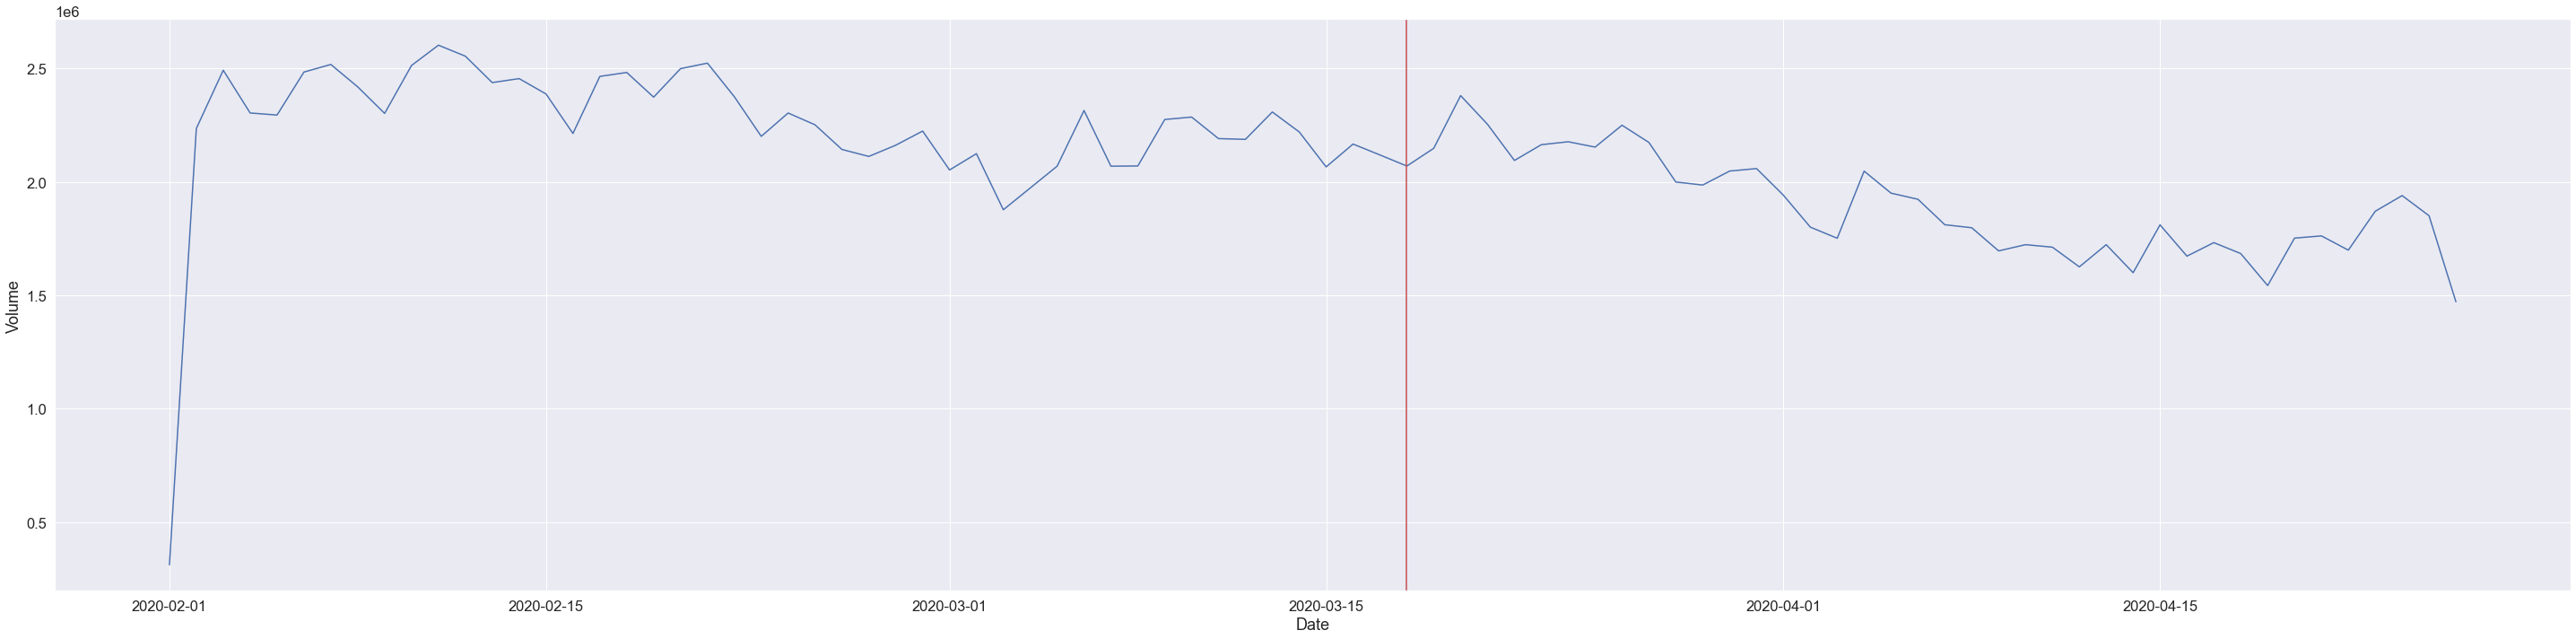

In [104]:
fig = plt.figure(figsize=(40,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [7]:
# df.to_csv('../../data/Flux_24h.csv', sep = ',')

### Origins count and list

In [68]:
len(df.groupby(by = 'Origin').groups.keys())

27

In [69]:
list((df.groupby(by = 'Origin').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Hors_Zone',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [70]:
df['Origin'].value_counts()

Hors_Zone         2210
Kinshasa          1067
Tshopo             578
Nord-Kivu          543
Haut-Katanga       530
Kasai-Central      503
Haut-Lomami        478
Kasai-Oriental     427
Lomami             407
Kwilu              395
Mongala            344
Kasai              326
Sud-Kivu           323
Tanganyika         310
Lualaba            304
Ituri              302
Equateur           294
Maniema            286
Sud-Ubangi         197
Bas-Uele           197
Kwango             192
Haut-Uele          189
Nord-Ubangi        180
Mai-Ndombe         174
Sankuru            134
Kongo-Central      130
Tshuapa             86
Name: Origin, dtype: int64

### Destination count and list

In [71]:
len(df.groupby(by = 'Destination').groups.keys())

26

In [72]:
list((df.groupby(by = 'Destination').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [73]:
df['Destination'].value_counts()

Kinshasa          1078
Tshopo             644
Nord-Kivu          642
Haut-Katanga       578
Kasai-Central      577
Kasai-Oriental     536
Haut-Lomami        527
Lomami             505
Kwilu              468
Tanganyika         426
Kasai              425
Ituri              416
Mongala            408
Sud-Kivu           397
Lualaba            396
Maniema            384
Equateur           333
Sud-Ubangi         327
Haut-Uele          294
Bas-Uele           288
Nord-Ubangi        281
Kwango             271
Mai-Ndombe         269
Sankuru            239
Kongo-Central      206
Tshuapa            191
Name: Destination, dtype: int64

### Symmetry check 

In [74]:
df[((df['Origin'] == 'Bas-Uele') & (df['Destination'] == 'Kinshasa'))|((df['Origin'] == 'Kinshasa') & (df['Destination'] == 'Bas-Uele'))]

,Date,Origin,Destination,Volume,Date_day
6204,2020-03-17,Kinshasa,Bas-Uele,64,1
10670,2020-04-23,Bas-Uele,Kinshasa,22,3


### Shapefile Reading

In [85]:
zone_gd =gpd.read_file('./data/GEO DRC/RDC_Macro_Provinces.shp')
zone_gd

,Index,C0,C1,Surface,PROVINCE,Population,geometry
0,22,0.415854,0.011909,52049.63,Sud-Ubangi,2 744 345,"POLYGON ((18.68941 1.90628, 18.68649 1.90233, ..."
1,7,0.458879,0.012838,54171.85,Nord-Ubangi,1 037 000,"POLYGON ((20.39471 2.82687, 20.38231 2.81683, ..."
2,2,0.451896,0.042421,56144.21,Mongala,1 793 564,"POLYGON ((21.63564 0.72938, 21.63387 0.72562, ..."
3,24,0.351923,0.003476,102527.71,Equateur,1 626 606,"POLYGON ((16.94268 -1.86609, 16.94502 -2.00127..."
4,8,0.247170,0.006137,132254.42,Tshuapa,1 316 855,"POLYGON ((21.84714 -2.53010, 21.84408 -2.53239..."
5,18,0.448842,0.040899,128920.31,Maï-Ndombe,1 768 327,"POLYGON ((20.27067 -4.39762, 20.26608 -4.39898..."
6,11,0.860444,0.013058,54797.26,Kongo-Central,5 575 000,"POLYGON ((12.45101 -6.05762, 12.44231 -6.05843..."
7,6,0.825040,0.071389,10690.79,Kinshasa,12 641 463,"POLYGON ((15.83177 -5.02521, 15.83079 -5.02540..."
8,20,0.478043,0.036460,90159.33,Kwango,1 994 036,"POLYGON ((17.61132 -8.12849, 17.58297 -8.12907..."
9,17,0.589400,0.045920,79270.37,Kwilu,3 637 000,"POLYGON ((19.36211 -6.39133, 19.35877 -6.39137..."


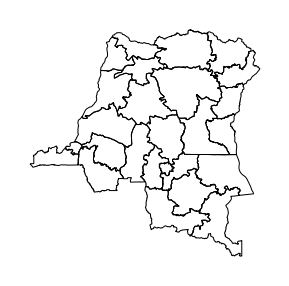

In [106]:
gpl.polyplot(zone_gd, figsize=(5,5))
plt.show()

# Mobility Visualization

## $\Delta$ Mobillity (IN) By Provinces

In [89]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-04-26'

mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref = df.loc[mask_base]
df_obs = df.loc[mask_obs]


## Reference period

In [94]:
df_ref_agg = df_ref.groupby(by='Destination',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg.drop('Date_day',inplace=True,axis = 1)
df_ref_agg

,Destination,Volume
8,Kasai-Oriental,15292732
18,Nord-Kivu,11204380
13,Lomami,11026697
21,Sud-Kivu,9678955
2,Haut-Katanga,9677673
7,Kasai-Central,7640799
9,Kinshasa,6960349
14,Lualaba,6437172
24,Tshopo,3831610
10,Kongo-Central,3405006


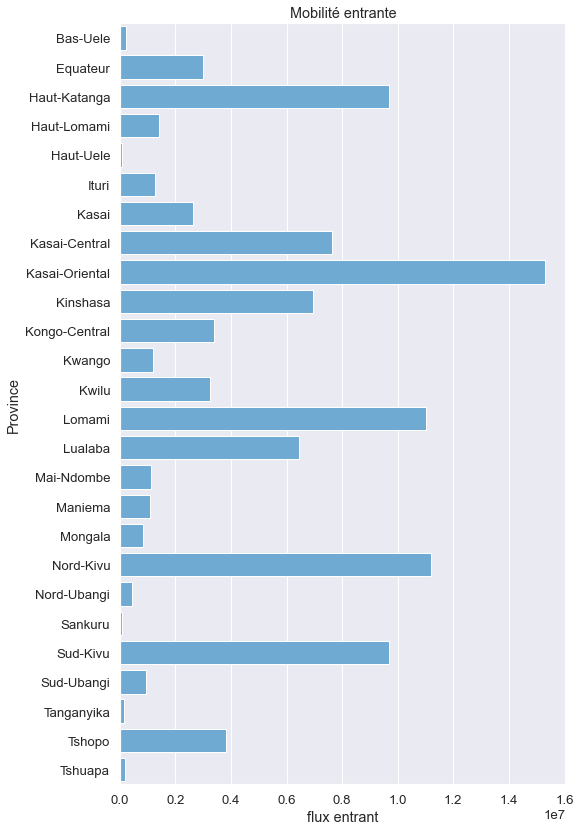

In [114]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_ref_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

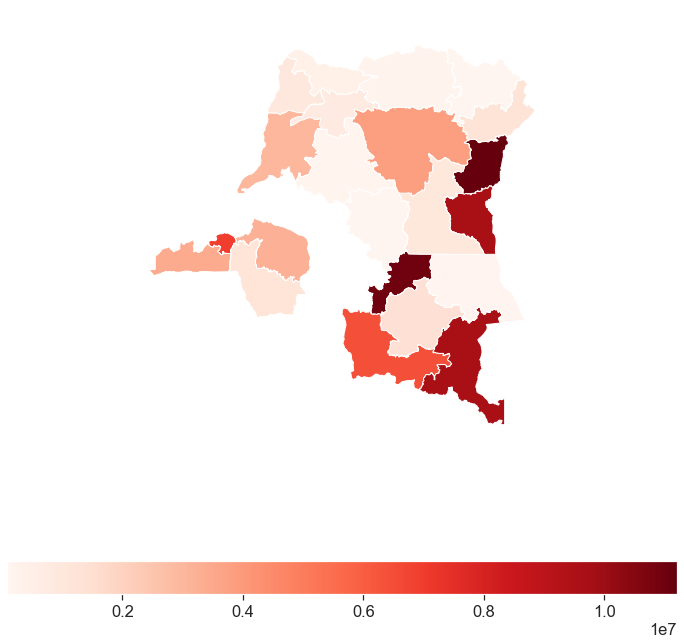

In [110]:
merged_df_agg = zone_gd.merge(df_ref_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [95]:
df_obs_agg = df_obs.groupby(by='Destination',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg.drop('Date_day',inplace=True,axis = 1)
df_obs_agg

,Destination,Volume
8,Kasai-Oriental,12226107
13,Lomami,9404910
18,Nord-Kivu,8013060
21,Sud-Kivu,7166514
2,Haut-Katanga,6145894
7,Kasai-Central,5860994
14,Lualaba,4256177
9,Kinshasa,3877542
12,Kwilu,2300431
1,Equateur,2117320


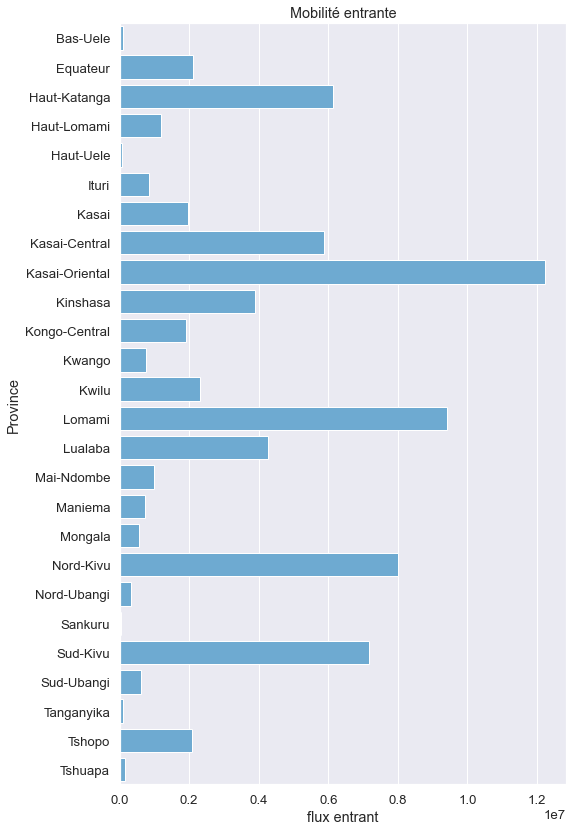

In [115]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_obs_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

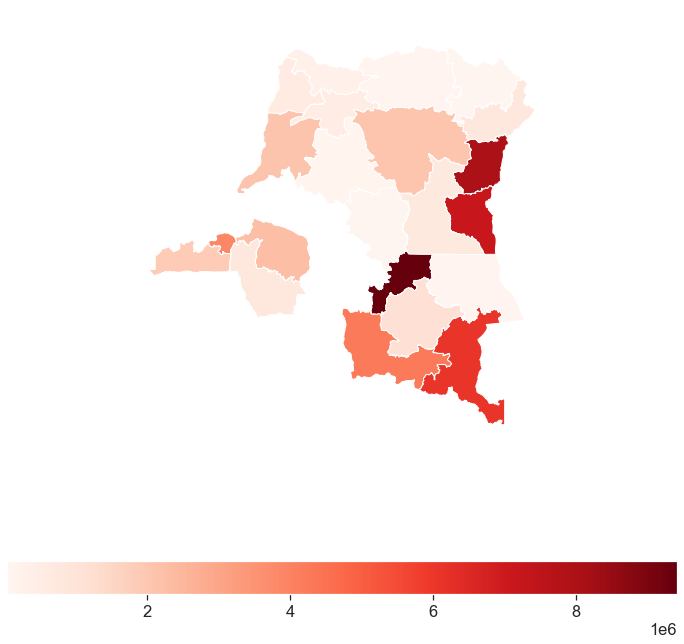

In [112]:
merged_df_agg = zone_gd.merge(df_obs_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [129]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Destination',right_on='Destination')
df_merged_agg['deltaVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='Destination')
df_merged_agg

,Destination,Volume_x,Volume_y,deltaVolume
21,Bas-Uele,224885,101844,-54.712853
11,Equateur,3002091,2117320,-29.471825
4,Haut-Katanga,9677673,6145894,-36.494093
13,Haut-Lomami,1414269,1176974,-16.778633
24,Haut-Uele,98287,79798,-18.811236
14,Ituri,1270773,828350,-34.815266
12,Kasai,2633195,1976297,-24.946804
5,Kasai-Central,7640799,5860994,-23.293441
0,Kasai-Oriental,15292732,12226107,-20.052826
6,Kinshasa,6960349,3877542,-44.290983


In [121]:
# dict_mob = {}
# for dest in list((df.groupby(by = 'Destination').groups.keys())):
#     baseline_value = df_ref['Volume'].loc[df_ref['Destination'] == dest ].sum() 
#      #avoid division by zero
#     if(baseline_value == 0):
#         continue
#     current_value = df_obs['Volume'].loc[df_obs['Destination'] == dest ].sum() 
#     dict_mob[dest] = (current_value - baseline_value)*100/baseline_value
# dict_mob
# df_mobility = pd.DataFrame(dict(provinces = list(dict_mob.keys()),Volume = list(dict_mob.values())))
# df_mobility

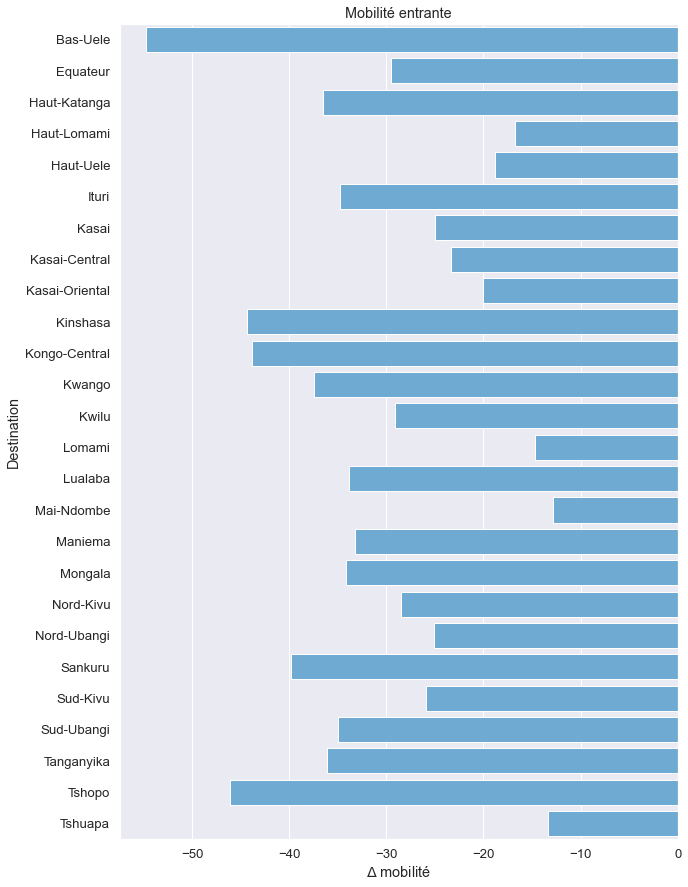

In [128]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Destination", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg, orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = '$\Delta$ mobilité')
plt.show()

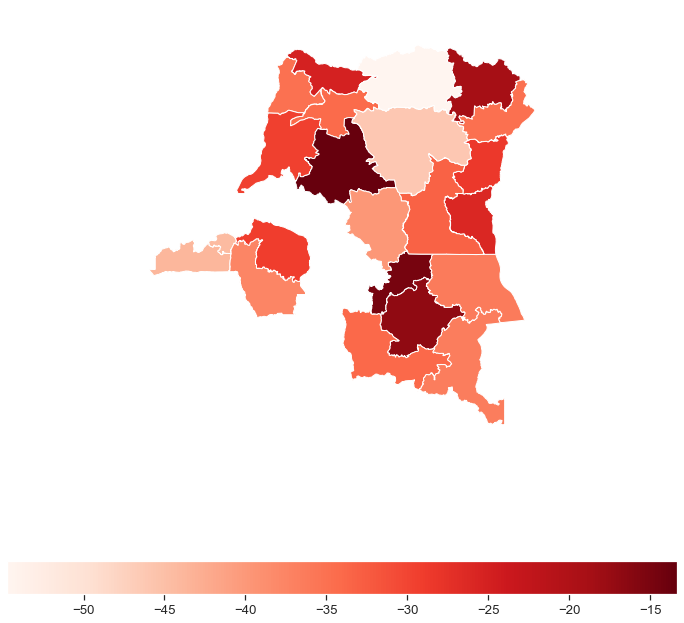

In [132]:
merged_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_agg, hue=merged_agg['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## $\Delta$ Mobillity (OUT) By Provinces

In [133]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-04-26'

mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref_out = df.loc[mask_base]
df_obs_out = df.loc[mask_obs]


## Reference period

In [134]:
df_ref_agg_out = df_ref_out.groupby(by='Origin',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg_out.drop('Date_day',inplace=True,axis = 1)
df_ref_agg_out

,Origin,Volume
5,Hors_Zone,40405580
9,Kasai-Oriental,13194064
14,Lomami,9753661
19,Nord-Kivu,7703853
22,Sud-Kivu,7252647
2,Haut-Katanga,5155701
15,Lualaba,5143593
8,Kasai-Central,4488588
10,Kinshasa,3214917
11,Kongo-Central,1893547


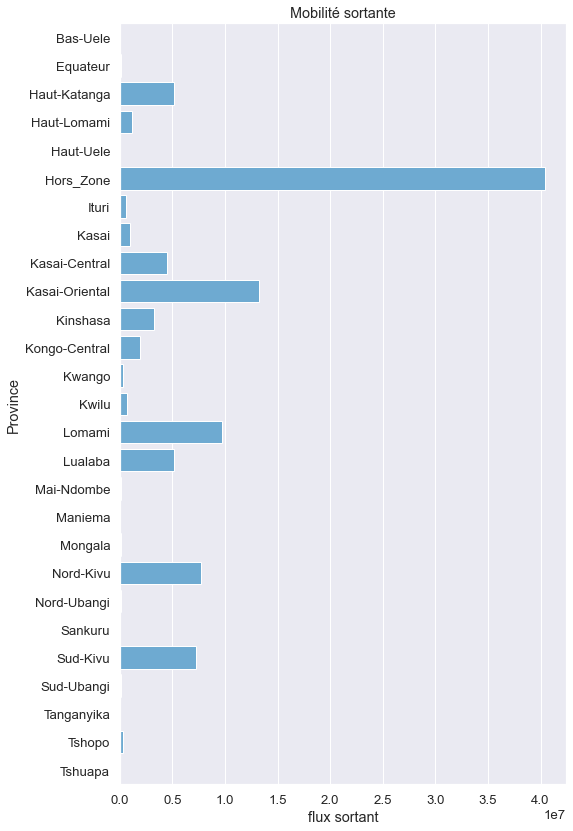

In [136]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_ref_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

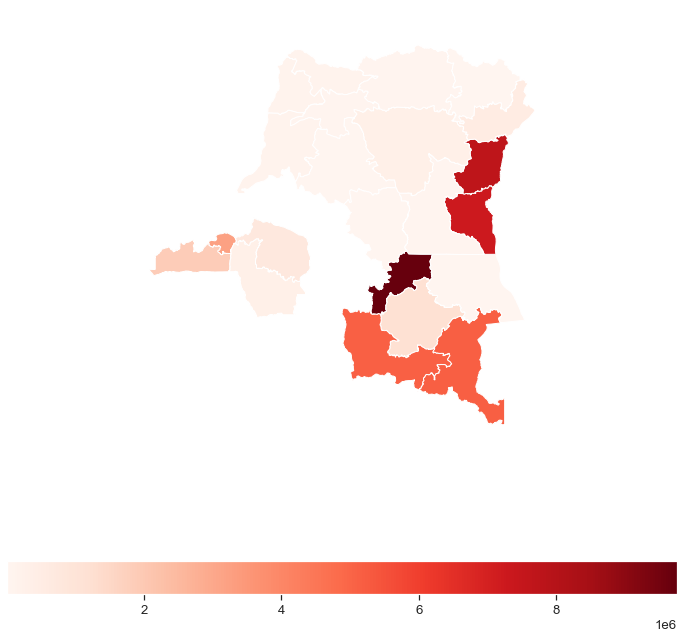

In [138]:
merged_df_agg_out = zone_gd.merge(df_ref_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [139]:
df_obs_agg_out = df_obs_out.groupby(by='Origin',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg_out.drop('Date_day',inplace=True,axis = 1)
df_obs_agg_out

,Origin,Volume
5,Hors_Zone,26125184
9,Kasai-Oriental,11000994
14,Lomami,8477355
19,Nord-Kivu,5862376
22,Sud-Kivu,5682384
8,Kasai-Central,3809470
15,Lualaba,3531354
2,Haut-Katanga,3446514
10,Kinshasa,1304020
3,Haut-Lomami,1071119


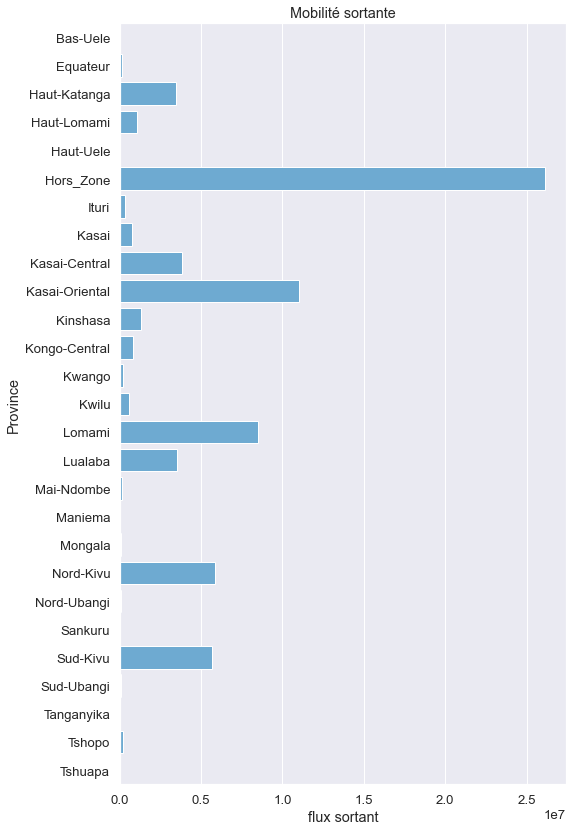

In [141]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_obs_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

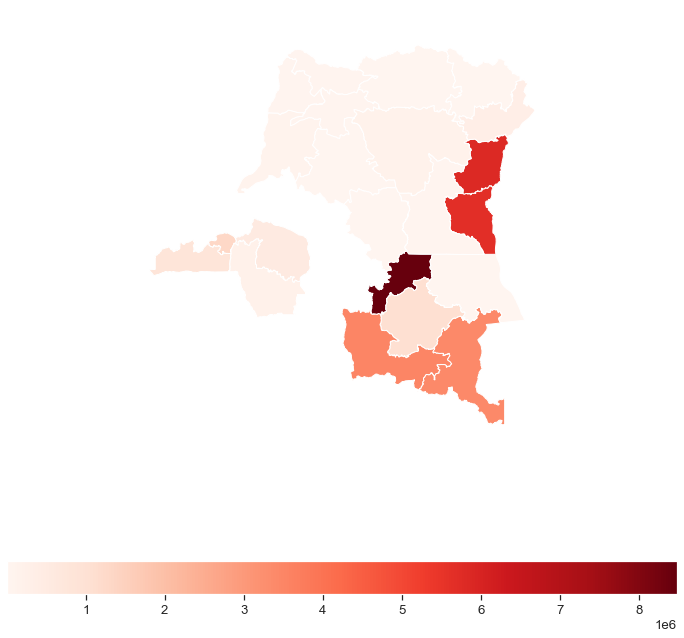

In [143]:
merged_df_agg_out = zone_gd.merge(df_obs_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [146]:
df_merged_agg_out = pd.merge(df_ref_agg_out,df_obs_agg_out,left_on='Origin',right_on='Origin')
df_merged_agg_out['deltaVolume'] = (df_merged_agg_out.Volume_y - df_merged_agg_out.Volume_x )/df_merged_agg_out.Volume_x*100
df_merged_agg_out = df_merged_agg_out.sort_values(by='deltaVolume')
df_merged_agg_out

,Origin,Volume_x,Volume_y,deltaVolume
23,Tanganyika,38480,14415,-62.538981
8,Kinshasa,3214917,1304020,-59.438455
9,Kongo-Central,1893547,812719,-57.079544
17,Sud-Ubangi,154235,69168,-55.154148
19,Nord-Ubangi,124484,62070,-50.138170
24,Haut-Uele,21826,11764,-46.100980
14,Tshopo,316933,190899,-39.766765
13,Ituri,551973,351844,-36.257027
0,Hors_Zone,40405580,26125184,-35.342633
15,Kwango,315963,207565,-34.307182


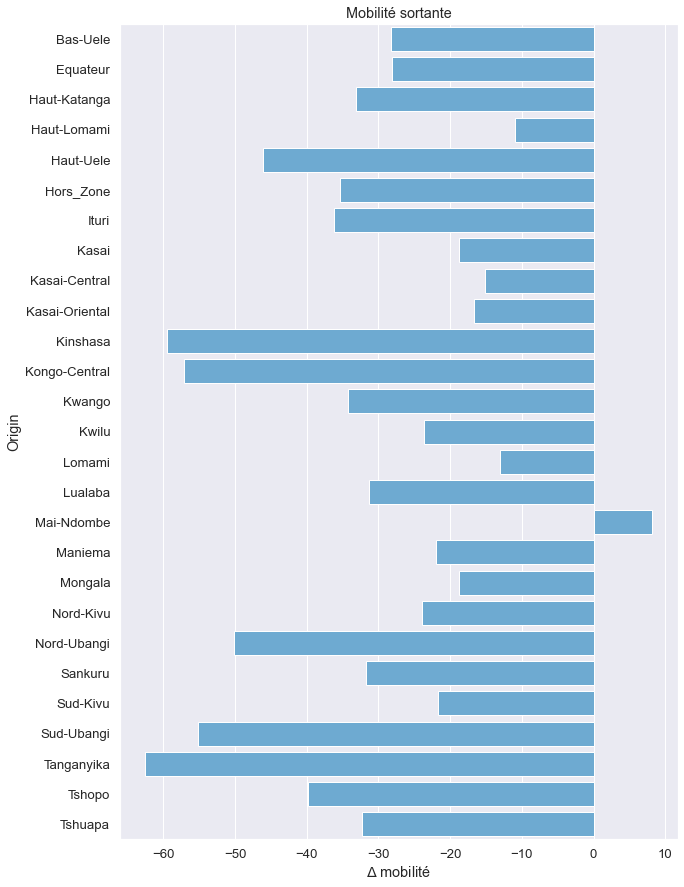

In [148]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Origin", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_out.sort_values(by='Origin'), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = '$\Delta$ mobilité')
plt.show()

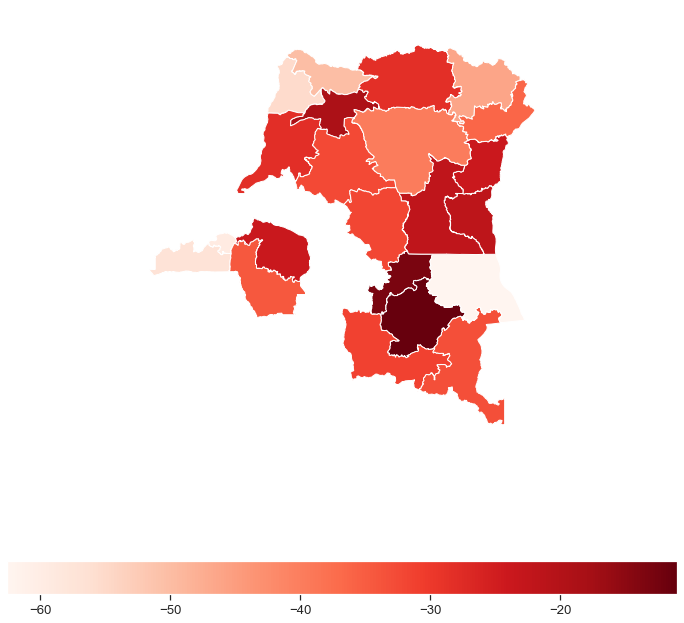

In [149]:
merged_agg_out = zone_gd.merge(df_merged_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

# Presence Visualization

In [249]:
# reading csv file
dfp = pd.read_csv('data/Zoning Province/Presence_24h.csv',sep = ';')
dfp

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume
0,2020-02-01,WE,Jour,Local,Hors_Zone,Hors_Zone,Tanganyika,97809
1,2020-02-01,WE,Nuit,Local,Hors_Zone,Hors_Zone,Tanganyika,29221
2,2020-02-01,WE,Jour,Local,Tanganyika,Hors_Zone,Tanganyika,81166
3,2020-02-01,WE,Nuit,Local,Tanganyika,Hors_Zone,Tanganyika,18468
4,2020-02-01,WE,Jour,Local,Haut-Katanga,Hors_Zone,Tanganyika,135
...,...,...,...,...,...,...,...,...
102830,2020-04-26,WE,Nuit,Etranger,Nord-Kivu,Hors_Zone,Nord-Kivu,1605
102831,2020-04-26,WE,Jour,Etranger,Hors_Zone,Nord-Kivu,Nord-Kivu,1543
102832,2020-04-26,WE,Nuit,Etranger,Hors_Zone,Nord-Kivu,Nord-Kivu,1838
102833,2020-04-26,WE,Jour,Etranger,Nord-Kivu,Nord-Kivu,Nord-Kivu,5109


In [250]:
dfp.count()

Date             102835
Day_type         102835
PresenceType     102835
Type             102835
Activity_Zone    102835
Home_Zone        102835
Zone             102835
Volume           102835
dtype: int64

In [251]:
# Conversion of date field
dfp['Date'] = pd.to_datetime(dfp['Date'])
# dfp['Date_day'] = dfp['Date'].dt.weekday

In [252]:
list((dfp.groupby(by = 'Day_type').groups.keys()))

['JO', 'WE']

In [253]:
list((dfp.groupby(by = 'PresenceType').groups.keys()))

['Jour', 'Nuit']

In [254]:
list((dfp.groupby(by = 'Type').groups.keys()))

['Etranger', 'Local']

In [255]:
activities_zone = list((dfp.groupby(by = 'Activity_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [256]:
home_zone = list((dfp.groupby(by = 'Home_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [257]:
zone = list((dfp.groupby(by = 'Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [271]:
df_dzp = dfp.groupby(["Date","Zone",'PresenceType'],as_index=0).sum()
df_dzp.groupby(["Zone",'PresenceType'],as_index=0).median()

,Zone,PresenceType,Volume
0,Bas-Uele,Jour,145641
1,Bas-Uele,Nuit,81160
2,Equateur,Jour,7614758
3,Equateur,Nuit,5561595
4,Haut-Katanga,Jour,17275136
5,Haut-Katanga,Nuit,10623551
6,Haut-Lomami,Jour,606452
7,Haut-Lomami,Nuit,321707
8,Haut-Uele,Jour,104886
9,Haut-Uele,Nuit,44034




Let's first consider presence at night

In [272]:
#Aggregate by date and zone
dfp_night = dfp[dfp.PresenceType == 'Nuit']
dfp_agg_date_zone = dfp_night.groupby(by=['Date','Zone'],as_index=0).sum()
dfp_agg_date_zone

,Date,Zone,Volume
0,2020-02-01,Bas-Uele,70584
1,2020-02-01,Equateur,5267119
2,2020-02-01,Haut-Katanga,10700953
3,2020-02-01,Haut-Lomami,317502
4,2020-02-01,Haut-Uele,41529
...,...,...,...
2101,2020-04-26,Sud-Kivu,7185379
2102,2020-04-26,Sud-Ubangi,1211429
2103,2020-04-26,Tanganyika,132103
2104,2020-04-26,Tshopo,10720731


### Visualization of some distributions

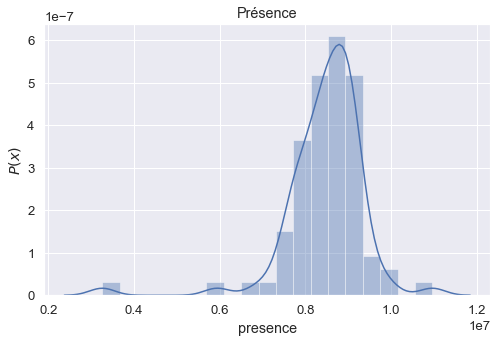

In [281]:
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(a=dfp_agg_date_zone[(dfp_agg_date_zone.Zone == 'Kinshasa')]["Volume"])
ax.set(title = 'Présence',xlabel = "presence",ylabel = '$P(x)$')
plt.show()

In [274]:
dfp_agg_date_zone.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume')

,Zone,Volume
4,Haut-Uele,44034
20,Sankuru,58657
0,Bas-Uele,81160
23,Tanganyika,118834
25,Tshuapa,280698
3,Haut-Lomami,321707
19,Nord-Ubangi,572644
5,Ituri,884974
11,Kwango,1038857
17,Mongala,1096594


## Comparison of ref period and obs period

In [275]:
ref_start_date = '2020-02-02'
ref_end_date = '2020-03-18'

mask_base = (dfp_agg_date_zone['Date'] >= ref_start_date) & (dfp_agg_date_zone['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-04-26'

mask_obs = (dfp_agg_date_zone['Date'] >= obs_start_date) & (dfp_agg_date_zone['Date'] <= obs_end_date)

df_ref_p = dfp_agg_date_zone.loc[mask_base]
df_obs_p = dfp_agg_date_zone.loc[mask_obs]

In [278]:
#data aggregation
df_ref_agg_p = df_ref_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg_p.drop('Date_day',inplace=True,axis = 1)

df_obs_agg_p = df_obs_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_obs_agg_p.drop('Date_day',inplace=True,axis = 1)


df_merged_agg_p = pd.merge(df_ref_agg_p,df_obs_agg_p,left_on=['Zone'],right_on=['Zone'])
df_merged_agg_p['deltaVolume'] = (df_merged_agg_p.Volume_y - df_merged_agg_p.Volume_x )/df_merged_agg_p.Volume_x*100
df_merged_agg_p = df_merged_agg_p.sort_values(by='deltaVolume')
df_merged_agg_p

,Zone,Volume_x,Volume_y,deltaVolume
23,Bas-Uele,97409,54918,-43.621226
24,Sankuru,66702,47572,-28.679800
19,Nord-Ubangi,586920,477698,-18.609351
16,Mongala,1159501,975424,-15.875536
21,Tshuapa,288542,243437,-15.632040
25,Haut-Uele,46292,39523,-14.622397
22,Tanganyika,121799,107400,-11.821936
14,Kasai,1378578,1224300,-11.191097
15,Sud-Ubangi,1360388,1214330,-10.736496
17,Kwango,1089411,973727,-10.618949


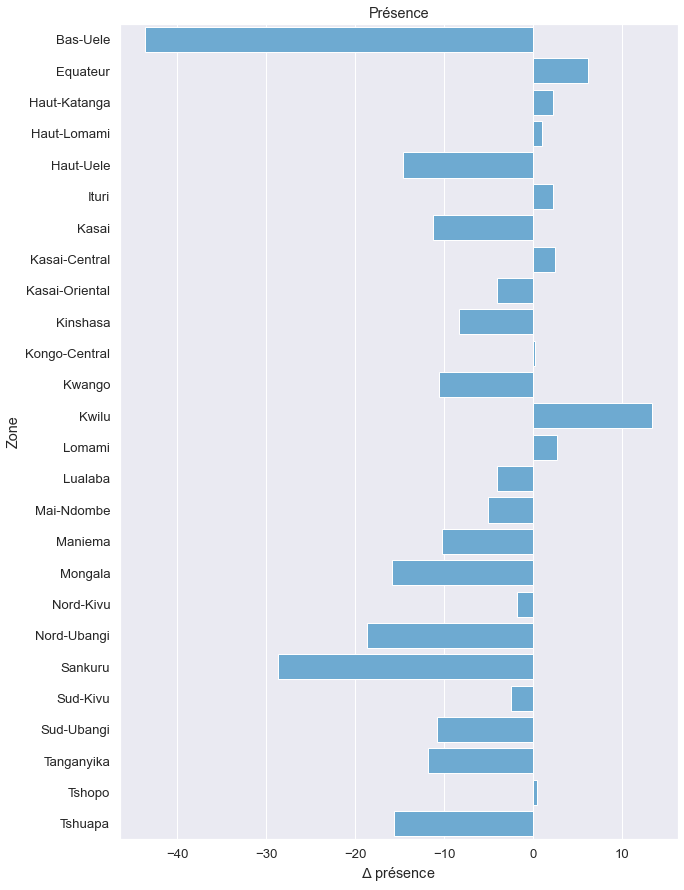

In [279]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Zone", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_p.sort_values(by='Zone'), orient = 'h')
ax.set(title = 'Présence',xlabel = '$\Delta$ présence')
plt.show()

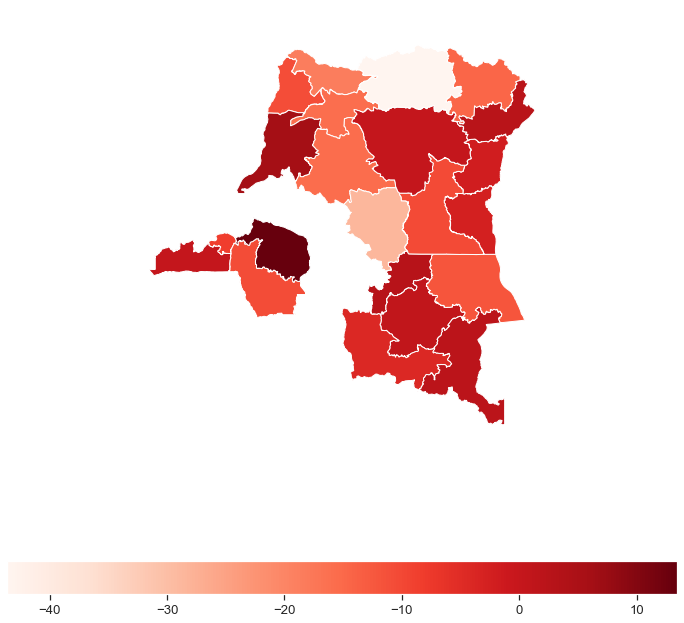

In [280]:
merged_agg_out = zone_gd.merge(df_merged_agg_p,left_on = 'PROVINCE', right_on = 'Zone' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()